k       x_k
2        4.0
3        3.5
4        3.75
5        3.625
6        3.5625
7        3.59375
8        3.578125
9        3.5859375
10        3.58984375
11        3.591796875
12        3.5908203125
13        3.59130859375
14        3.591064453125
15        3.5911865234375
16        3.59112548828125
17        3.591094970703125
18        3.5911102294921875
19        3.5911178588867188
20        3.5911216735839844
21        3.5911197662353516
22        3.591120719909668
23        3.591121196746826


The value of x where the max occurs is  3.591121196746826

The maximum value of f(xmax) is  0.27846454276107313



Text(0.5, 1.0, 'x vs k')

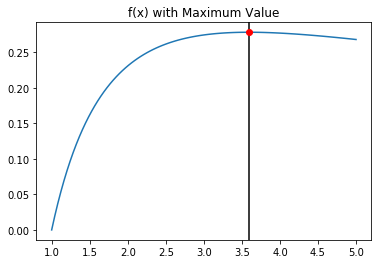

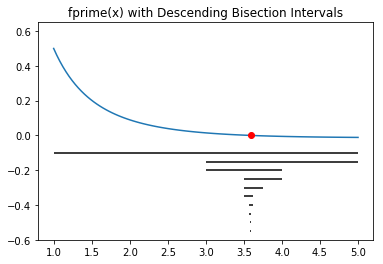

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 17 20:51:46 2020

Performs the bisection algorithm to optimize a given function.
Written for Assignment 1 of Math 572: Computational Statistics. 

@author: claytonfields
"""
import matplotlib.pyplot as plt
import numpy as np



#define function f(x) to be optimized
def f(x):
    return np.log(x)/(1+x)

#define the derivative of f(x)
def fprime(x):
    return (1+1/x-np.log(x))/(1+x)**2

#set an interval on which to search for max
a = 1.0
b = 5.0

#choose x as the middle of the interval
x = .5*(a+b)

#choose a suitable termination criteria
eps = .000001
kmax = 100

#initialize variable for bisection loop
k =1
xhist = [x]
khist = [k]
ahist = [a]
bhist = [b]

#perform bisection to find zero of f'(x)
print('k       x_k')
while ((b-a)>eps) and k<kmax:
    if fprime(a)*fprime(x)<=0:
        b=x
    elif fprime(a)*fprime(x)>0:
        a=x
    ahist.append(a)
    bhist.append(b)
    x = .5*(a+b)
    xhist.append(x)
    k=k+1
    khist.append(k)
    print(k, '      ', x)
print()
print()
print('The value of x where the max occurs is ',x)    
print()
print('The maximum value of f(xmax) is ',f(x))
print()
#print('The value of f\'(xmax) is ',fprime(x))

#domanins for plotting
xx = np.linspace(1,5,100)
xk = np.linspace(1,k,k)

#plot the results of bisection
plt.plot(xx,f(xx))
plt.title('f(x) with Maximum Value')
plt.plot(x,f(x))
plt.axvline(x=x, color='black', label="x=3.59112")
plt.plot(x,f(x),'ro')

plt.figure()
plt.title('fprime(x) with Descending Bisection Intervals')
plt.plot(xx,fprime(xx))
plt.plot(x,fprime(x),'ro')
for i in range(len(ahist)):
#    plt.axhline()
    y = -.1+-.05*i
    plt.plot(ahist[i],y,'r')
    plt.plot(bhist[i],y,'b')
    plt.hlines(y=y,xmin=ahist[i],xmax=bhist[i],label=str(i+1))
plt.ylim(-.6,.65)

plt.figure()
plt.plot(khist,xhist)
plt.title('x vs k')